# Exercises

### Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .
2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
from wrangle import wrangle_zillow
df_zillow = wrangle_zillow()
df_zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [21]:
df_zillow.fips.value_counts()

6037    1393369
6059     539747
6111     161467
Name: fips, dtype: int64

bedroomcnt


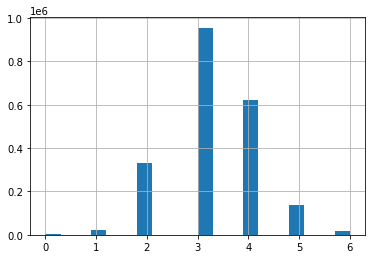

bathroomcnt


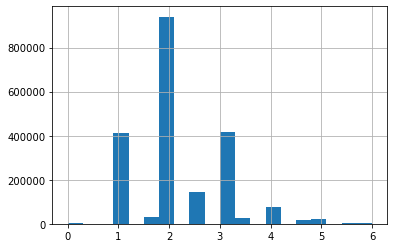

calculatedfinishedsquarefeet


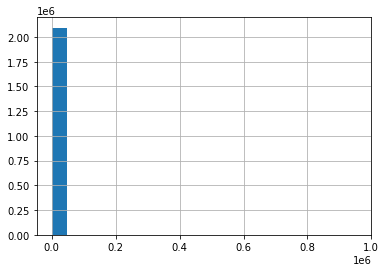

taxvaluedollarcnt


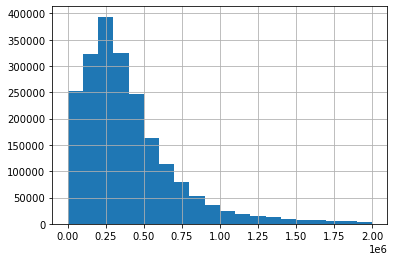

yearbuilt


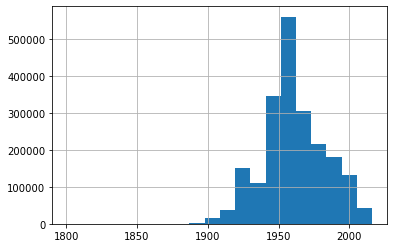

taxamount


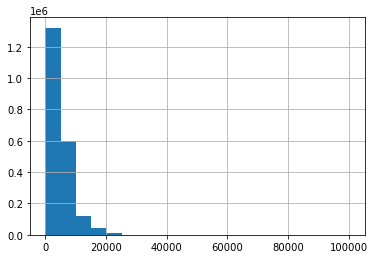

fips


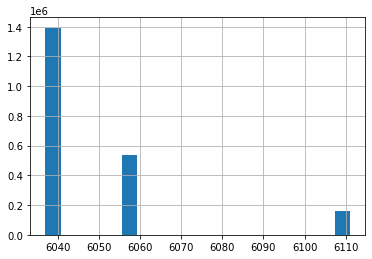

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_zillow.columns:
    print(col)
    df_zillow[col].hist(bins=20)
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# split data into train 56%, validate 24%, test 20%
train_and_validate, test = train_test_split(df_zillow, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

In [18]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
176880,3,2.0,1714,115157,1973,1282.32,6059
331975,3,3.0,1862,345618,1958,5530.82,6059
1753349,5,5.0,3959,1451000,1953,15884.95,6037
120218,3,3.0,2100,459187,1962,5619.06,6037
1991743,4,2.0,1954,403193,1980,5047.67,6037


In [9]:
# use min-max scalling to create the object
import sklearn.preprocessing

scaler = sklearn.preprocessing.MinMaxScaler()

cols_to_scale = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

scaler.fit(train[cols_to_scale])

train_scaled = scaler.transform(train[cols_to_scale])
validate_scaled = scaler.transform(validate[cols_to_scale])
test_scaled = scaler.transform(test[cols_to_scale])

In [10]:
train_scaled

array([[0.00179828, 0.05756828],
       [0.00195365, 0.17280033],
       [0.00415505, 0.72549879],
       ...,
       [0.00135737, 0.04893866],
       [0.00133638, 0.18069844],
       [0.00138047, 0.09735881]])

In [11]:
train_scaled = pd.DataFrame(train_scaled)
train_scaled = train_scaled.rename(columns = {0 :'squarefeet_scaled',1 :'taxvalue_scaled'})
train_scaled.head()

,squarefeet_scaled,taxvalue_scaled
0,0.001798,0.057568
1,0.001954,0.172800
2,0.004155,0.725499
3,0.002204,0.229586
4,0.002050,0.201588


Text(0.5, 1.0, 'Scaled')

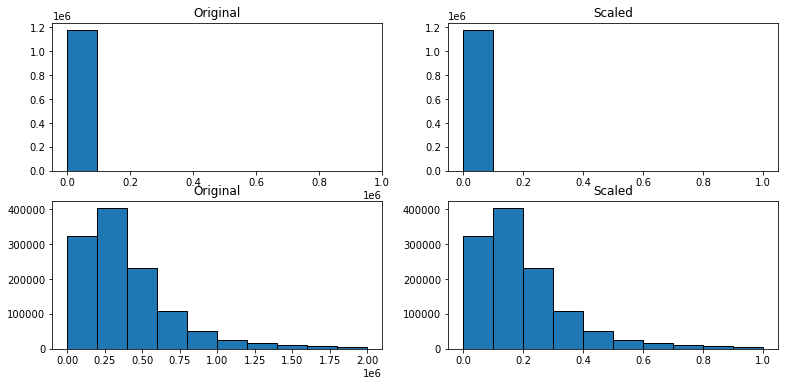

In [12]:
plt.figure(figsize=(13, 6))
plt.subplot(221)
plt.hist(train.calculatedfinishedsquarefeet, bins=10, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(train_scaled.squarefeet_scaled, bins=10, ec='black')
plt.title('Scaled')

plt.subplot(223)
plt.hist(train.taxvaluedollarcnt, bins=10, ec='black')
plt.title('Original')
plt.subplot(224)
plt.hist(train_scaled.taxvalue_scaled, bins=10, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled_ss')

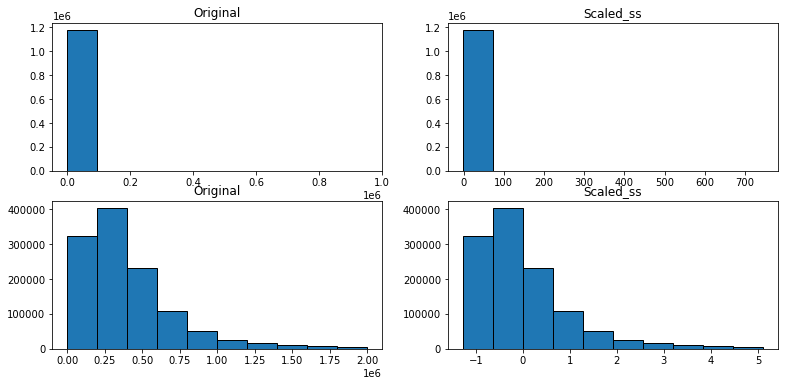

In [13]:
# StandardScaler

ss = sklearn.preprocessing.StandardScaler()

cols_to_scale = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

ss.fit(train[cols_to_scale])

train_scaled_ss = ss.transform(train[cols_to_scale])

train_scaled_ss = pd.DataFrame(train_scaled_ss)
train_scaled_ss = train_scaled_ss.rename(columns = {0 :'squarefeet_scaled',1 :'taxvalue_scaled'})

plt.figure(figsize=(13, 6))
plt.subplot(221)
plt.hist(train.calculatedfinishedsquarefeet, bins=10, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(train_scaled_ss.squarefeet_scaled, bins=10, ec='black')
plt.title('Scaled_ss')

plt.subplot(223)
plt.hist(train.taxvaluedollarcnt, bins=10, ec='black')
plt.title('Original')
plt.subplot(224)
plt.hist(train_scaled_ss.taxvalue_scaled, bins=10, ec='black')
plt.title('Scaled_ss')

Text(0.5, 1.0, 'Scaled_ss')

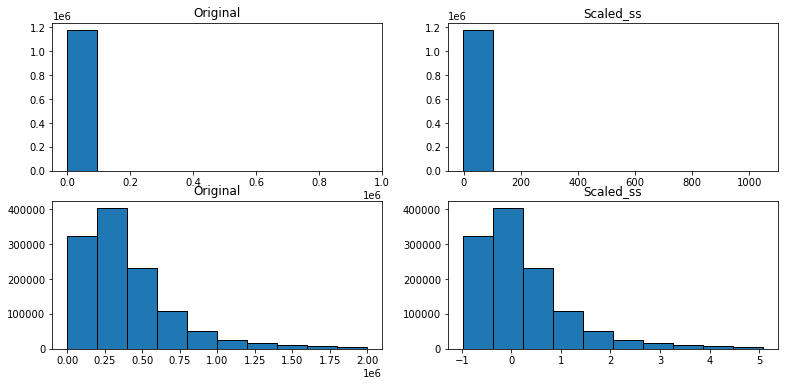

In [14]:
# RobustScaler

rs = sklearn.preprocessing.RobustScaler()

cols_to_scale = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

rs.fit(train[cols_to_scale])

train_scaled_rs = rs.transform(train[cols_to_scale])

train_scaled_rs = pd.DataFrame(train_scaled_rs)
train_scaled_rs = train_scaled_rs.rename(columns = {0 :'squarefeet_scaled',1 :'taxvalue_scaled'})

plt.figure(figsize=(13, 6))
plt.subplot(221)
plt.hist(train.calculatedfinishedsquarefeet, bins=10, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(train_scaled_rs.squarefeet_scaled, bins=10, ec='black')
plt.title('Scaled_ss')

plt.subplot(223)
plt.hist(train.taxvaluedollarcnt, bins=10, ec='black')
plt.title('Original')
plt.subplot(224)
plt.hist(train_scaled_rs.taxvalue_scaled, bins=10, ec='black')
plt.title('Scaled_ss')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

Text(0.5, 1.0, 'inverse')

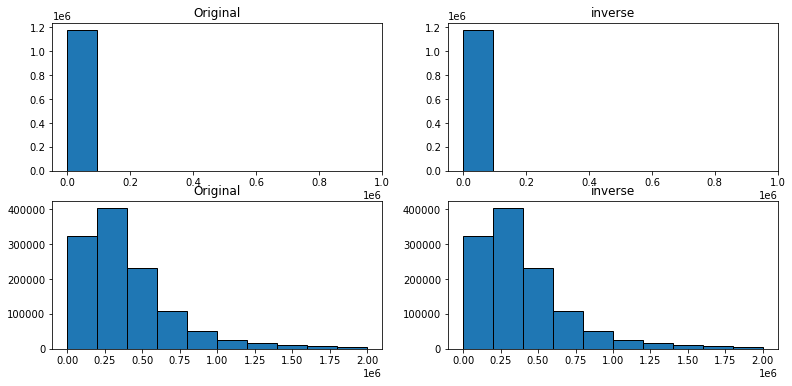

In [27]:
train_scaled_inverse = scaler.inverse_transform(train_scaled)

train_scaled_inverse = pd.DataFrame(train_scaled_inverse)
train_scaled_inverse = train_scaled_inverse.rename(columns = {0 :'squarefeet_scaled',1 :'taxvalue_scaled'})

plt.figure(figsize=(13, 6))
plt.subplot(221)
plt.hist(train.calculatedfinishedsquarefeet, bins=10, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(train_scaled_inverse.squarefeet_scaled, bins=10, ec='black')
plt.title('inverse')

plt.subplot(223)
plt.hist(train.taxvaluedollarcnt, bins=10, ec='black')
plt.title('Original')
plt.subplot(224)
plt.hist(train_scaled_inverse.taxvalue_scaled, bins=10, ec='black')
plt.title('inverse')

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [28]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

cols_to_scale = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

qt.fit(train[cols_to_scale])

train_qt = qt.transform(train[cols_to_scale])
validate_qt = qt.transform(validate[cols_to_scale])
test_qt = qt.transform(test[cols_to_scale])

In [29]:
train_qt = pd.DataFrame(train_qt)
train_qt = train_qt.rename(columns = {0 :'squarefeet_qt_scaled',1 :'taxvalue_qt_scaled'})
train_qt

,squarefeet_qt_scaled,taxvalue_qt_scaled
0,0.161281,-1.075566
1,0.353041,0.092410
2,2.040550,2.135574
3,0.619072,0.498746
4,0.461215,0.306102
...,...,...
1178197,1.664082,0.719072
1178198,0.165095,-0.362864
1178199,-0.576075,-1.194641
1178200,-0.621099,0.154120


Text(0.5, 1.0, 'QT Scaled')

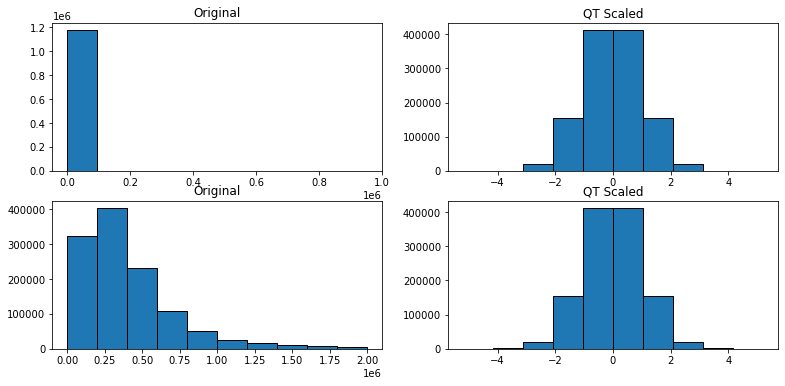

In [30]:
plt.figure(figsize=(13, 6))
plt.subplot(221)
plt.hist(train.calculatedfinishedsquarefeet, bins=10, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(train_qt.squarefeet_qt_scaled, bins=10, ec='black')
plt.title('QT Scaled')

plt.subplot(223)
plt.hist(train.taxvaluedollarcnt, bins=10, ec='black')
plt.title('Original')
plt.subplot(224)
plt.hist(train_qt.taxvalue_qt_scaled, bins=10, ec='black')
plt.title('QT Scaled')

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Text(0.5, 1.0, 'QT1 Scaled')

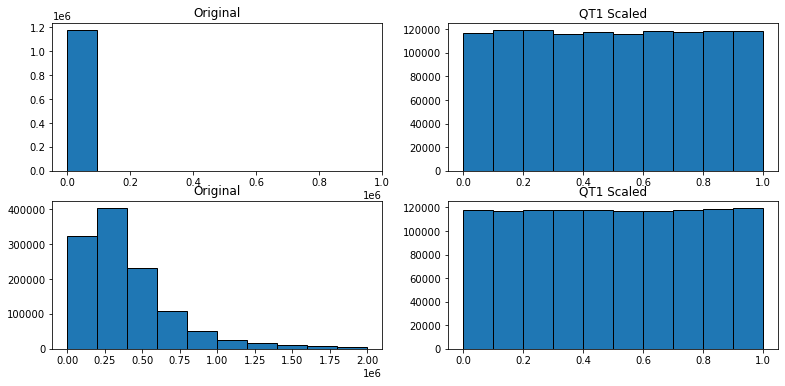

In [31]:
qt1 = QuantileTransformer()

cols_to_scale = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

qt1.fit(train[cols_to_scale])

train_qt1 = qt1.transform(train[cols_to_scale])

train_qt1 = pd.DataFrame(train_qt1)
train_qt1 = train_qt1.rename(columns = {0 :'squarefeet_qt_scaled',1 :'taxvalue_qt_scaled'})

plt.figure(figsize=(13, 6))
plt.subplot(221)
plt.hist(train.calculatedfinishedsquarefeet, bins=10, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(train_qt1.squarefeet_qt_scaled, bins=10, ec='black')
plt.title('QT1 Scaled')

plt.subplot(223)
plt.hist(train.taxvaluedollarcnt, bins=10, ec='black')
plt.title('Original')
plt.subplot(224)
plt.hist(train_qt1.taxvalue_qt_scaled, bins=10, ec='black')
plt.title('QT1 Scaled')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

The scale method I will choose is the 'MinMaxScaler'

In [32]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
176880,3,2.0,1714,115157,1973,1282.32,6059
331975,3,3.0,1862,345618,1958,5530.82,6059
1753349,5,5.0,3959,1451000,1953,15884.95,6037
120218,3,3.0,2100,459187,1962,5619.06,6037
1991743,4,2.0,1954,403193,1980,5047.67,6037


In [33]:
train_scaled = train_scaled.set_index([train.index.values])

In [34]:
train['squarefeet_scaled'] = train_scaled['squarefeet_scaled']
train['taxvalue_scaled'] = train_scaled['taxvalue_scaled']

In [35]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,squarefeet_scaled,taxvalue_scaled
176880,3,2.0,1714,115157,1973,1282.32,6059,0.001798,0.057568
331975,3,3.0,1862,345618,1958,5530.82,6059,0.001954,0.172800
1753349,5,5.0,3959,1451000,1953,15884.95,6037,0.004155,0.725499
120218,3,3.0,2100,459187,1962,5619.06,6037,0.002204,0.229586
1991743,4,2.0,1954,403193,1980,5047.67,6037,0.002050,0.201588


In [39]:
df_zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [37]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df_zillow, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
176880,3,2.0,1714,115157,1973,1282.32,6059
331975,3,3.0,1862,345618,1958,5530.82,6059
1753349,5,5.0,3959,1451000,1953,15884.95,6037
120218,3,3.0,2100,459187,1962,5619.06,6037
1991743,4,2.0,1954,403193,1980,5047.67,6037


In [5]:
from sklearn.model_selection import train_test_split

def split_zillow(df):
    
    train_and_validate, test = train_test_split(df, random_state=123)
    train, validate = train_test_split(train_and_validate, random_state=123)
    
    return train, validate, test

In [42]:
# test split function
train, validate, test = split_zillow(df_zillow)
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
176880,3,2.0,1714,115157,1973,1282.32,6059
331975,3,3.0,1862,345618,1958,5530.82,6059
1753349,5,5.0,3959,1451000,1953,15884.95,6037
120218,3,3.0,2100,459187,1962,5619.06,6037
1991743,4,2.0,1954,403193,1980,5047.67,6037


In [7]:
# function for getting scaled data sets

from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import numpy as np
import pandas as pd

def scale_zillow(df):
    train, validate, test = split_zillow(df)
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    cols_to_scale = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']
    scaler.fit(train[cols_to_scale])

    train_scaled = scaler.transform(train[cols_to_scale])
    validate_scaled = scaler.transform(validate[cols_to_scale])
    test_scaled = scaler.transform(test[cols_to_scale])
    
    train_scaled = pd.DataFrame(train_scaled)
    train_scaled = train_scaled.rename(columns = {0 :'squarefeet_scaled',1 :'taxvalue_scaled'})
    train_scaled = train_scaled.set_index([train.index.values])
    train['squarefeet_scaled'] = train_scaled['squarefeet_scaled']
    train['taxvalue_scaled'] = train_scaled['taxvalue_scaled']
    
    validate_scaled = pd.DataFrame(validate_scaled)
    validate_scaled = validate_scaled.rename(columns = {0 :'squarefeet_scaled',1 :'taxvalue_scaled'})
    validate_scaled = validate_scaled.set_index([validate.index.values])
    validate['squarefeet_scaled'] = validate_scaled['squarefeet_scaled']
    validate['taxvalue_scaled'] = validate_scaled['taxvalue_scaled']
    
    test_scaled = pd.DataFrame(test_scaled)
    test_scaled = test_scaled.rename(columns = {0 :'squarefeet_scaled',1 :'taxvalue_scaled'})
    test_scaled = test_scaled.set_index([test.index.values])
    test['squarefeet_scaled'] = test_scaled['squarefeet_scaled']
    test['taxvalue_scaled'] = test_scaled['taxvalue_scaled']
    
    return train, validate, test

In [45]:
# test sclaed function

train, validate, test = scale_zillow(df_zillow)
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,squarefeet_scaled,taxvalue_scaled
176880,3,2.0,1714,115157,1973,1282.32,6059,0.001798,0.057568
331975,3,3.0,1862,345618,1958,5530.82,6059,0.001954,0.172800
1753349,5,5.0,3959,1451000,1953,15884.95,6037,0.004155,0.725499
120218,3,3.0,2100,459187,1962,5619.06,6037,0.002204,0.229586
1991743,4,2.0,1954,403193,1980,5047.67,6037,0.002050,0.201588


In [1]:
# test the function
from wrangle import wrangle_zillow, scale_zillow
df_zillow = wrangle_zillow()
df_zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [2]:
train, validate, test = scale_zillow(df_zillow)
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,squarefeet_scaled,taxvalue_scaled
176880,3,2.0,1714,115157,1973,1282.32,6059,0.001798,0.057568
331975,3,3.0,1862,345618,1958,5530.82,6059,0.001954,0.172800
1753349,5,5.0,3959,1451000,1953,15884.95,6037,0.004155,0.725499
120218,3,3.0,2100,459187,1962,5619.06,6037,0.002204,0.229586
1991743,4,2.0,1954,403193,1980,5047.67,6037,0.002050,0.201588


In [15]:
df_zillow.bedroomcnt.value_counts()

3    955909
4    621076
2    332538
5    138255
1     22724
6     19800
0      4281
Name: bedroomcnt, dtype: int64